In [1]:
import pandas as pd
import numpy as np
import re
from nltk.tokenize import TweetTokenizer

# Reading the data

In [2]:
df= pd.read_csv("Elon_musk.csv")

In [3]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,Text
0,@kunalb11 I�m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [34]:
pos = open("positive-words.txt")
file_read=pos.read()
pos_words=file_read.splitlines()
pos_words

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '; Opinion Lexicon: Positive',
 ';',
 '; This file contains a list of POSITIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from ',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list, please cite one of the following two papers:',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ',
 ';       Washington, USA, ',
 ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ',
 ';       and Comparing Opinions on the Web." Proceedings of the 14th ',
 ';       International World Wide Web conference (WWW-2005), May 10-14, ',
 ';       2005, Chiba, Japan.',
 ';',
 '; Notes: ',
 ';    1. The appearance of an opi

In [35]:
for i in range(0,len(pos_words)):
    if pos_words[i]=='a+':
        print(i)

35


In [36]:
pos_words=pos_words[35:]
pos_words

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [7]:
neg = open("negative-words.txt")
file_read=neg.read()
neg_words=file_read.splitlines()
neg_words

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '; Opinion Lexicon: Negative',
 ';',
 '; This file contains a list of NEGATIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from ',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list, please cite one of the following two papers:',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ',
 ';       Washington, USA, ',
 ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ',
 ';       and Comparing Opinions on the Web." Proceedings of the 14th ',
 ';       International World Wide Web conference (WWW-2005), May 10-14, ',
 ';       2005, Chiba, Japan.',
 ';',
 '; Notes: ',
 ';    1. The appearance of an o

In [8]:
neg_words = neg_words[35:]
neg_words

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',


# Text preprocessing

In [9]:
# dropping all special characters
df['Text']=df['Text'].apply(lambda x:re.sub('[^A-Za-z@ ]',"",x))

In [10]:
# changing all tweets to lowercase
df['Text']=df['Text'].apply(lambda x:x.lower())

In [11]:
# remove Twitter username handles from a given twitter text. (Removes @usernames)
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
df['Text']=df['Text'].apply(lambda x : tknzr.tokenize(x))

In [12]:
df.head()

,Text
0,"[im, an, alien]"
1,"[ray, tracing, on, cyberpunk, with, hdr, is, n..."
2,"[great, interview]"
3,"[doge, is, underestimated]"
4,"[congratulations, tesla, china, for, amazing, ..."


In [13]:
a_file = open("stop.txt")
file_contents = a_file. read()
stopwords=file_contents.splitlines()

In [14]:
# removing the stopwords
df['Text'] = df['Text'].apply(lambda x : [word for word in x if word not in set(stopwords)])

In [15]:
# performing lemmatization to find parent word of each word
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
df['Text']=df['Text'].apply(lambda x:[lem.lemmatize(word) for word in x])
df.head()

,Text
0,"[im, alien]"
1,"[ray, tracing, cyberpunk, hdr, nextlevel]"
2,"[great, interview]"
3,"[doge, underestimated]"
4,"[congratulation, tesla, china, amazing, execut..."


In [16]:
# forming the sentiment data from the positive and negative words text files given
# 1: positive sentiment
# 0: neutral sentiment
# -1: negative sentiment
sentiment = []
for i in range(0,len(df['Text'])):
    sentiment.append(0)
df['Sentiment']=sentiment

In [17]:
i=0
sentiment=[]
for val in df['Text']:
    for word in val:
        if (word in pos_words):
            df['Sentiment'][i]=1
            break
        elif (word in neg_words):
            df['Sentiment'][i]=-1
            break
    i=i+1

<ipython-input-17-cd1dbc0aa095>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'][i]=1
<ipython-input-17-cd1dbc0aa095>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'][i]=-1


In [18]:
df

,Text,Sentiment
0,"[im, alien]",0
1,"[ray, tracing, cyberpunk, hdr, nextlevel]",0
2,"[great, interview]",1
3,"[doge, underestimated]",0
4,"[congratulation, tesla, china, amazing, execut...",1
...,...,...
1994,"[true, sound, surreal, negative, propaganda, a...",1
1995,"[make, read, ur, term, amp, condition, clickin...",0
1996,"[samwise, gamgee]",0
1997,"[altho, dumb, dumber, ufuf]",-1


In [19]:
df['Sentiment'].value_counts()

 0    1195
 1     509
-1     295
Name: Sentiment, dtype: int64

In [20]:
# rejoining the text to form the sentence
df['Text']=df['Text'].apply(lambda x: " ".join(x))

In [21]:
df.head()

,Text,Sentiment
0,im alien,0
1,ray tracing cyberpunk hdr nextlevel,0
2,great interview,1
3,doge underestimated,0
4,congratulation tesla china amazing execution year,1


# TFIDF

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
tf = TfidfVectorizer()
tf_val=tf.fit_transform(df.Text.values)

In [24]:
final_df=pd.DataFrame(tf_val.todense(),columns=tf.get_feature_names())

In [25]:
final_df

,aber,abo,aboard,abort,absence,absolute,absolutely,absorb,absorption,absurd,...,young,youre,youve,yup,zealand,zenit,zero,zip,zon,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df.iloc[50:100,:]

,Text,Sentiment
50,true,0
51,ufuf,0
52,easy decade intense work note email text,1
53,,0
54,lesson learned,0
55,earth mar,-1
56,time story tesla amp spacex,0
57,read great,1
58,kingdom httpstcojeeihmv,0
59,havent heard year,0


# Creating the model

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as ac

In [28]:
x_train,x_test,y_train,y_test=train_test_split(final_df,df['Sentiment'],test_size=0.3)

In [29]:
models = [DecisionTreeClassifier(),LogisticRegression()]
for model in models:
    model.fit(x_train,y_train)
    print("Accuracy score of model "+str(model)+" is: "+str(ac(y_test,model.predict(x_test))))



Accuracy score of model DecisionTreeClassifier() is: 0.7733333333333333
Accuracy score of model LogisticRegression() is: 0.6933333333333334


# Accuracy score of model DecisionTreeClassifier() is: 0.77

### Visualisation

In [44]:
from wordcloud import WordCloud

In [39]:
#performing stemming
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
pos_words=[ps.stem(word) for word in pos_words]

In [41]:
l=[]
for cat in df.Text:
    try:
        semi_split=cat.split()
        for val in semi_split:
            l.append(str(val))
        
    except:
        break
text = " ".join(word for word in l)

In [42]:
text

'im alien ray tracing cyberpunk hdr nextlevel great interview doge underestimated congratulation tesla china amazing execution year happy year ox httpstcowfkmyuoj frodo underdogeall thought failhimself httpstcozgxjfdzzrm haha tweet represent realworld time allocation entertaining outcome agree clubhouse httpstcorweuhsts real bought dogecoin lil toddler hodler issue sentencing bit high fixing unlock account ufuf true power haha httpstcofcuhqsdo crypto wallet wont give private key avoided cost app suck rt nasa selected falcon heavy launch element lunar gateway mission httpstcopwt predict cash flow starlink ipo starlink staggeringly difficult technical amp economic endeavor don httpstcozacskqx spacex pas deep chasm negative cash flow year httpstcojchdjl lowest cost ton carbon sequestered net product made scalable httpstcoxmyiqwsgw meant price country difference tax amp shipping intended earth idea apply mar ufuf xprize team manage carbon capture prize httpstcofswianlr tesla receives stock

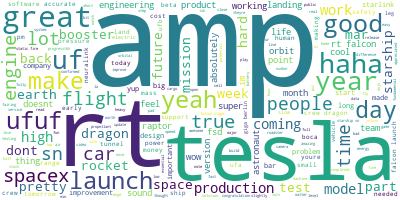

In [45]:
word_cloud = WordCloud(background_color="white").generate(text)
word_cloud.to_image()

In [50]:
count=0
for i in range(0,419):
    if(final_df["amp"][i]>0):
        count=count+1
print(count)

38


In [53]:
count=0
for i in range(0,419):
    if(final_df["tesla"][i]>0):
        count=count+1
print(count)

17


In [51]:
count=0
for i in range(0,419):
    if(final_df["rt"][i]>0):
        count=count+1
print(count)

15


Hence we see that majority of tweets contain "rt","tesla","rt" 